<a href="https://colab.research.google.com/github/Neallaz/Machine-Learning/blob/main/Predict%20House%20Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

# Load data
data = fetch_california_housing(as_frame=True)
df = data.frame

# View the first rows
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000

<Axes: >

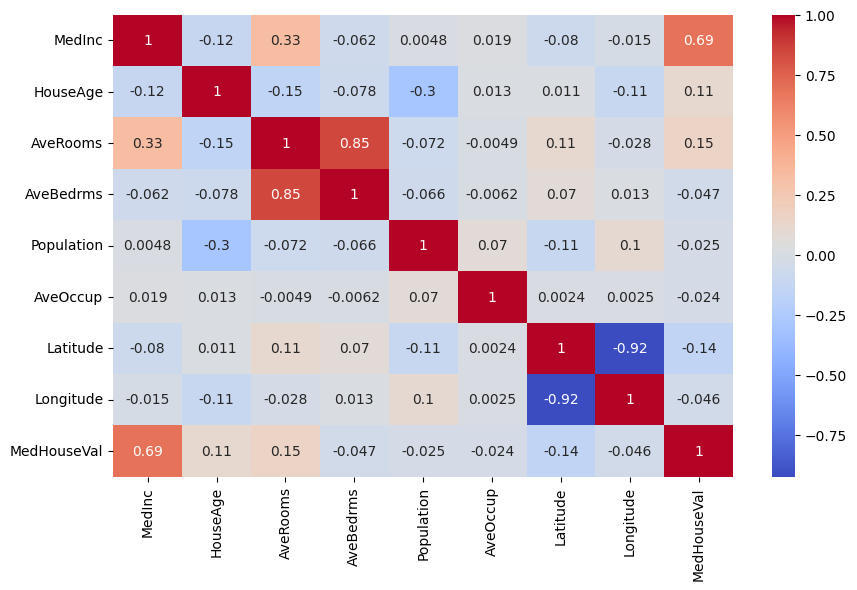

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for nulls
print(df.isnull().sum())

# Summary statistics
print(df.describe())

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

[[-0.326196    0.34849025 -0.17491646 ...  0.05137609 -1.3728112
   1.27258656]
 [-0.03584338  1.61811813 -0.40283542 ... -0.11736222 -0.87669601
   0.70916212]
 [ 0.14470145 -1.95271028  0.08821601 ... -0.03227969 -0.46014647
  -0.44760309]
 ...
 [-0.49697313  0.58654547 -0.60675918 ...  0.02030568 -0.75500738
   0.59946887]
 [ 0.96545045 -1.07984112  0.40217517 ...  0.00707608  0.90651045
  -1.18553953]
 [-0.68544764  1.85617335 -0.85144571 ... -0.08535429  0.99543676
  -1.41489815]]


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.5558915986952442
[0.71912284 1.76401657 2.70965883 ... 4.46877017 1.18751119 2.00940251]
